# CS 39AA - Traditional ML Overview


Nearly everything we'll look at in this course is a form of supervised learning (although we'll see that language models typically take a slight twist on this and use what is called, self-supervised learning).

As we already discussed, supervised learning can roughly be split into two types of tasks, either regression or classification. We'll look at these each in turn now, as well as some foundational concepts of machine learning. Note that this notebook is similar in content and style to the Kaggle Course, [Intro to Machine Learning](https://www.kaggle.com/learn/intro-to-machine-learning). 

To run this notebook in Kaggle or Colab use the following links.

[![Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/sgeinitz/CS39AA/blob/main/nb2_traditional_ml_overview.ipynb)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/sgeinitz/CS39AA/blob/main/nb2_traditional_ml_overview.ipynb)


## I. Regression 

Although the title may immediately evoke the thought of a conventional least squares regression model, the term regression here is a more general one that simply means to say that the target/outcome is lies on a continuum. That is, the targets we will try to predict or estimate are not binary nor discrete in nature. 

### Step 1. Load and explore the data
As an example, let's look at the following data on house prices from Ames, Iowa (note that this data is from the [Kaggle House Price Competition](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques)). The target/outcome that we will want to later on predict is the house price itself. Let's load the data and start to explore.  

In [1]:
import pandas as pd
import numpy as np

data_URL = 'https://raw.githubusercontent.com/sgeinitz/CS39AA/main/data/trainB1.csv'
train_df = pd.read_csv(data_URL)

The pandas library has some useful functionality for managing datasets. The basic data type used is a pandas DataFrame, which we can confirm with the following.

In [2]:
type(train_df)

pandas.core.frame.DataFrame

Recall that Python is very much follows an object-oriented programming paradigm, and pandas is no exception to that. A pandas DataFrame has both attributes/fields as well as methods that can be called. One attribute/field that is useful to look is `shape`, which tells us how many rows and columns a DataFrame has. 

In [3]:
# 'shape' of a DataFrame is it's number of rows and columns
print("train_df.shape: ", train_df.shape)

# more specifically...
print(f"train_df has {train_df.shape[0]} rows and {train_df.shape[1]} columns")

train_df.shape:  (1460, 81)
train_df has 1460 rows and 81 columns


We will look at pandas more later on, b
ut for now let's continue exploring the housing prices dataset using the pandas `describe()` function/method. This will summarize each column using common descriptive statistics (i.e. mean, stdev, etc.).

In [4]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Notice that with `describe()` it says there are only 38 columns even though train_df has 81 columns. That's because only the numeric columns had meaningful descriptive statistics. To see non-numeric columns as well we can simply print out the first few rows of a DataFrame using `head()`, although note that even though it now says there are 81 columns we only see the first 10 and last 10. 

In [5]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


To see what all of the columns names are we can also print out the `columns` attribute/field of the DataFrame object.

In [6]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

We can start to visually explore some of the individual columns/fields now, starting with the target variable, `SalePrice`. 

We'll need `maplotlib` for this so we will import that first, and then plot. 

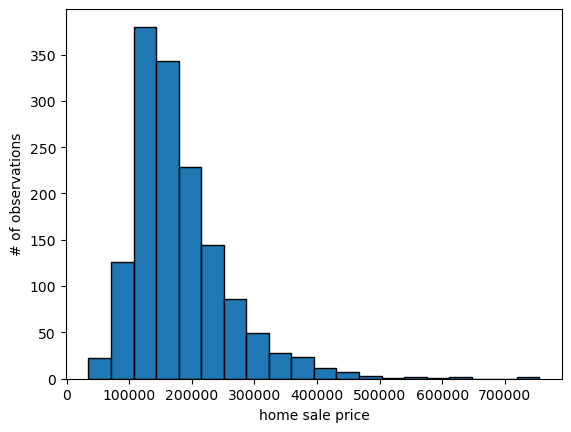

In [7]:
import matplotlib.pyplot as plt

plt.hist(train_df['SalePrice'], bins=20, edgecolor='black')
plt.xlabel("home sale price")
plt.ylabel("# of observations")
plt.show()

We can also start to explore some of the relationships between the features (i.e. independent variables) and the target (i.e. dependent variable). 

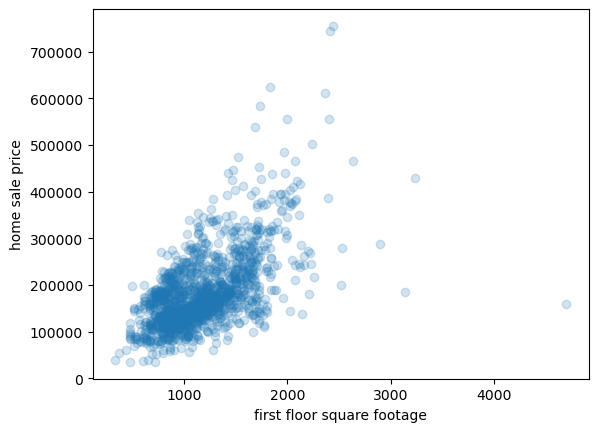

In [8]:
plt.scatter(train_df['1stFlrSF'], train_df['SalePrice'], alpha=0.2)
plt.xlabel("first floor square footage")
plt.ylabel("home sale price")
plt.show()

Now let's look at some of the categorical/discrete features, such as `SaleCondition`.

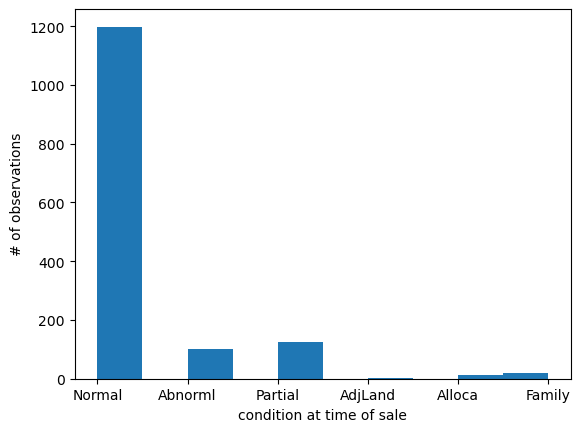

In [9]:
plt.hist(train_df['SaleCondition'])
plt.xlabel("condition at time of sale")
plt.ylabel("# of observations")
plt.show()

Before we can go much further we'll have to deal with some of the missing values in the data, so let's do that now with our DataFrame object's `isnull()` method, and then `sum()` method to add up the number of null entries in each column. 

In [10]:
null_entries = train_df.isnull().sum()
null_entries#[0:40]

#train_df_wo_nulls = train_df.drop(columns=cols_w_nulls.index)
#train_df_wo_nulls.isnull().sum()
#train_df.drop(columns=cols_w_nulls.index).isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

It looks like most of the columns have 0 missing/na values, which is good. Let's try looking at just the ones with at least 1 missing/na value. 

In [11]:
null_entries[null_entries > 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

The default number of rows displayed by pandas is still limiting how much we can see, so we'll increase that to see all of the fields.

In [12]:
pd.set_option('display.max_rows', 100)
null_entries[null_entries > 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

There are some columns with many missing values, although most of them are only missing a few. 

If we were working on a real project using this data then we would likely want to see whether those columns with just a few missing values are worth trying to salvage in some way (e.g. interpolation). For our purposes we will simply drop all of these columns from our dataset. 

We'll then convert the categorial fields (that are strings) to a numerical format and double check the data type of all of the columns in `X`. 

In [13]:
# Create temporary y=target and X=features, excluding those cols with missing values from X
cols_w_nulls = null_entries[null_entries > 0].index
X = train_df.drop(columns=cols_w_nulls).copy()
y = X.pop("SalePrice")

# Label encoding for categoricals
for colname in X.select_dtypes('object').columns:
    X[colname], _ = X[colname].factorize()

# can check data type of each column in X
#X.dtypes

### 2. Selecting features for a model

There are many ways to approach feature selection but we will quickly look at one using mutual information between each individual feature and the target. 

Let's create a simple wrapper around the scikit learn mutual information function to store and sort the results, which we can then plot.  

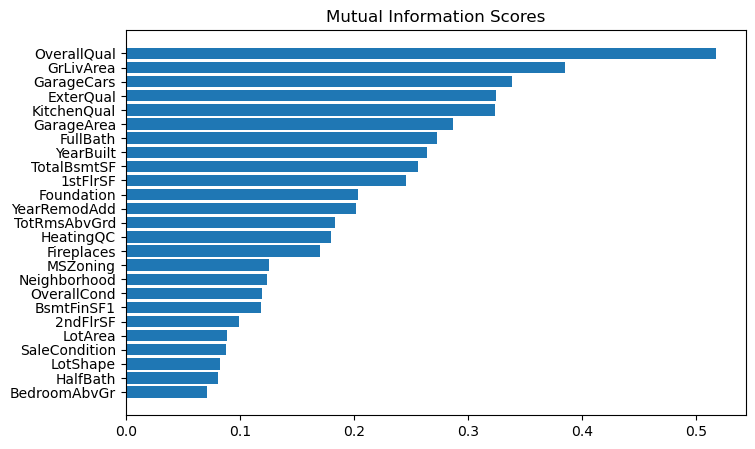

In [14]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y): 
    assert X.shape[0] == y.shape[0] and X.shape[1] > 1
    mi_scores = mutual_info_regression(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y)#, discrete_features)

# Look at every fifth score to see the range of values 
# Note: the range of possible values is positive reals, but in practice it rarely goes above 1.0 or 2.0
mi_scores[:11]

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

# plot the top 20 scores
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores[:25])

### 3.  Fit/Train a model

Let's start with a basic model, a linear regression model. 

Also, let's assume that we want to use only the most simple, objective, and unambiguous features. For example, the most informative feature, `OverallQual`, is a feature that was derived in some way that required human input. If we want to take only the features that can be quickly and precisely used, then `OverallQual` would not be one of them. However, `GarageCars`, and `1stFlrSF` would be. Let's take a set of ~10 such features and use those in our model. This model would be defined mathematically as:
  * $y = b_0 + b_1*x_1 + b_2*x_2 + ... + b_10 * x_10$,

where $x_1$ is `GrLivArea`, $x_2$ is `GarageCars`, and so on.  


In [15]:
from sklearn.linear_model import LinearRegression

# top informative features that are also easy/fast/precise to measure
#selected_features = mi_scores.index[:30]

selected_features = ['GrLivArea', 'GarageCars', 'GarageArea', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces']
X_linreg = X[selected_features].copy()

# declare and fit (i.e. train) a model
linreg_model = LinearRegression()
linreg_model.fit(X_linreg, y)

LinearRegression()

Next, we need to have a way to assess the fit of this model, or the model performance.  

As we saw in class, the most common way to assess a regression model is to minimize the average of the squared errors, which is also known as the mean-squared error (we'll look at this in more detail in the next section of this notebook also).

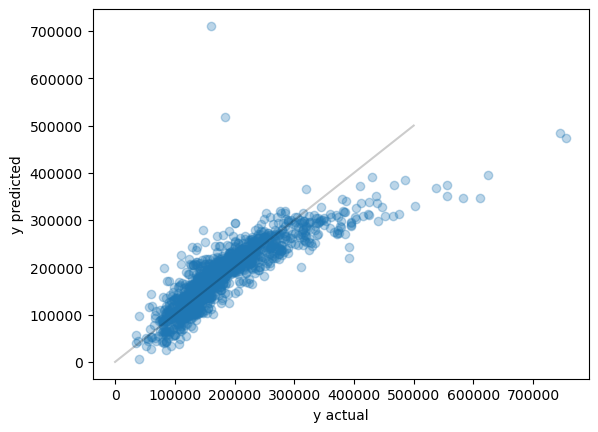

mse_linreg =  1717680784.9168966
rmse_linreg =  41444.91265423172


In [16]:
# Calculate predicted y's usign the linear regression model
y_pred = linreg_model.predict(X_linreg)

# Plot the predictions side-by-side with the actual values
# Note: a perfect model would yield the identity, y=x
plt.scatter(y, y_pred, alpha=0.3)
plt.xlabel('y actual')
plt.ylabel('y predicted')
plt.plot([0,5e5],[0,5e5], c='k', alpha=0.2)
plt.show()

# Calculate and show the mean squared error
mse_linreg = (((y - y_pred)**2).mean())
print("mse_linreg = ", mse_linreg)
print("rmse_linreg = ", np.sqrt(mse_linreg))

### 4. Feature Engineering

In the field of Data Science it is commonly said that 80-90% of the time is spent on cleaning and munging the data. Part of this process involves looking at the features and trying to derive new ones that can be used more readily by your model. In the case of linear regression we know that only linear relationships of the features are considered. 

That's not to say that a more complex relationship cannot be modeled, but we must manipulate and transform the features to allow a linear regression model to take advantage of it. 

For example, the true relationship between $y$ and $x$ may be quadratic in nature, i.e.: 
  * $y = a * x^2 + b * x + ...$. 

If we only observe $x$ though, then to incorporate this quadratic feature into the model we can create a new feature, $x^{'} = x * x$. 

Often times new features are combinations of other features, since many types of models cannot account for such interactions on their own (or they would require more data/training to do so).

In our case, suppose that we see the ratio of `GarageArea` to `1stFlrSF` helps our model perform better. Let's create this now and see how our model does. 


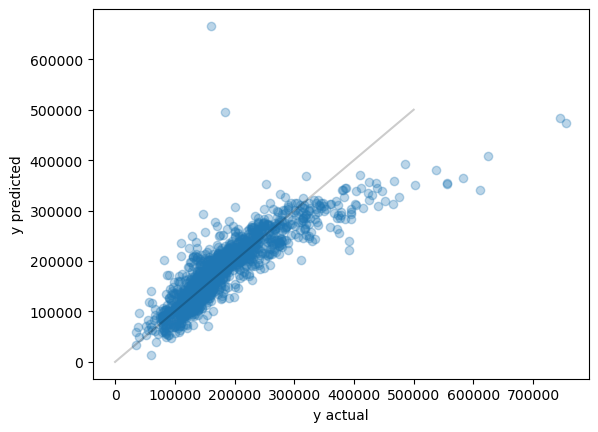

mse_linreg =  1638847176.0423117
rmse_linreg =  40482.67748114385


In [17]:
X_linreg['Garage1stFlrRatio'] = (X_linreg['GarageArea']/X_linreg['1stFlrSF'])
#plt.scatter(X_linreg['Garage1stFlrRatio'], y, alpha=0.2)
#plt.show()

linreg_model.fit(X_linreg, y)

# Calculate predicted y's usign the linear regression model
y_pred = linreg_model.predict(X_linreg)

# Plot the predictions side-by-side with the actual values
# Note: a perfect model would yield the identity, y=x
plt.scatter(y, y_pred, alpha=0.3)
plt.xlabel('y actual')
plt.ylabel('y predicted')
plt.plot([0,5e5],[0,5e5], c='k', alpha=0.2)
plt.show()

# Calculate and show the mean squared error
mse_linreg = (((y - y_pred)**2).mean())
print("mse_linreg = ", mse_linreg)
print("rmse_linreg = ", np.sqrt(mse_linreg))

Adding that feature is only a modest improvement in our case (~5% reduction in MSE), but interactions are often present in data yet difficult to incorporate for some types of models, particularly for linear regression.

Now we will try another traditional ML model, namely a decision tree. 

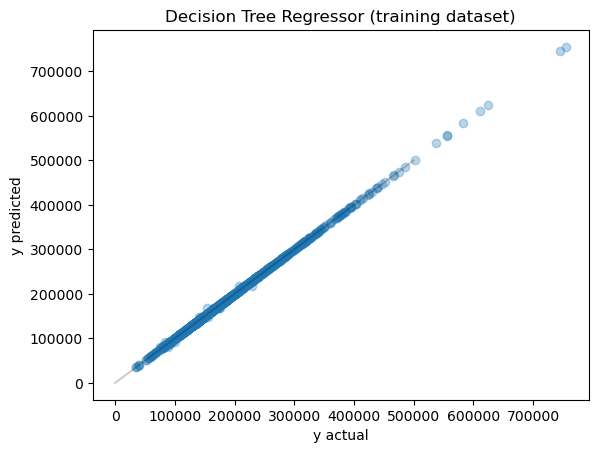

mse_linreg =  726150.8965753425
rmse_linreg =  852.1448800382142


In [22]:
from sklearn.tree import DecisionTreeRegressor
#from sklearn.ensemble import RandomForestRegressor

dectree_model = DecisionTreeRegressor(criterion='squared_error')
#dectree_model = RandomForestRegressor(criterion='mse', n_estimators=500)
dectree_model.fit(X_linreg, y)
y_pred = dectree_model.predict(X_linreg)

# Plot the predictions side-by-side with the actual values
# Note: a perfect model would yield the identity, y=x
plt.scatter(y, y_pred, alpha=0.3)
plt.xlabel('y actual')
plt.ylabel('y predicted')
plt.plot([0,5e5],[0,5e5], c='k', alpha=0.2)
plt.title("Decision Tree Regressor (training dataset)")
plt.show()

# Calculate and show the mean squared error
mse_linreg = (((y - y_pred)**2).mean())
print("mse_linreg = ", mse_linreg)
print("rmse_linreg = ", np.sqrt(mse_linreg))

Wait a second, what happened there? We have a nearly perfect model! 

Is there anything we should be concerned about before we begin using this model for our new Zillow-type business endeavor? 

### 5. Overfitting / Underfitting and the Train-Validate-Test Process

Yes, the issue with the decision tree we used above is that there was no maximum depth set for our tree, so it kept creating branches until it perfectly learned the dataset. 

We could play with the `max_depth` parameter to see how this affects predictions, but a more immediate way to confirm this is to see how well the model does on __out-of-sample__ data. That is, we can look at the MSE for another dataset that was not used to train/fit the model. We'll have to separate this out-of-sample data from the original dataset, and refit each model without this subset of data. Once we do, we can then compare the linear regression and decision tree model using this held out (aka __out-of-sample__) test dataset. 

For the test dataset:
    lin reg mse = 1500416131.68 (rmse = 38735.21)
    dectree mse = 2016028190.28 (rmse = 44900.20)
    decision tree loss 134.36% of linear regression loss


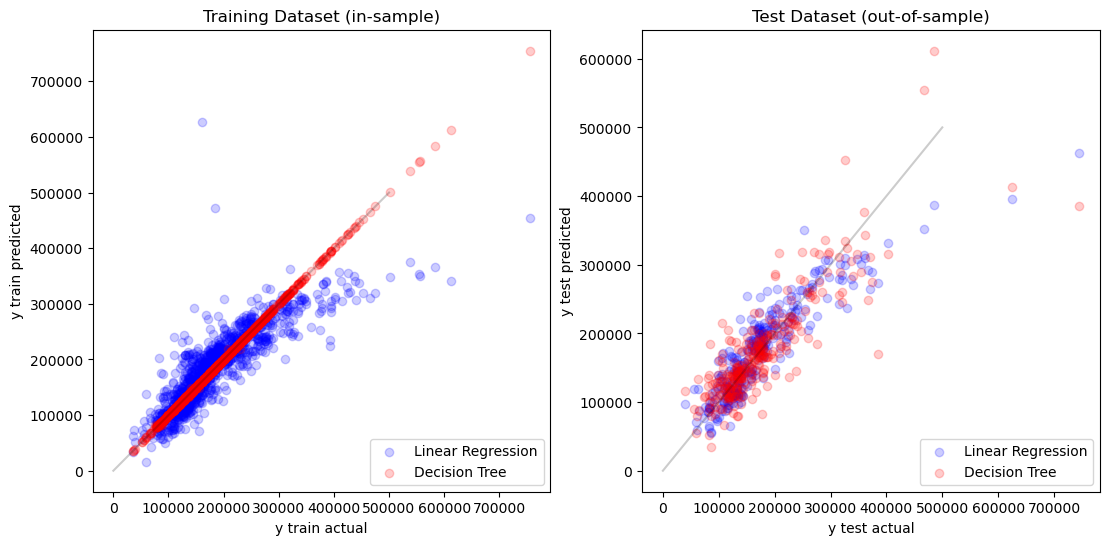

In [19]:
from sklearn.model_selection import train_test_split

# Create the train and test splits
X_train, X_test, y_train, y_test = train_test_split(X_linreg, y, test_size=0.2, random_state=1)

# Fit lin regression and calculate predicted test y's
linreg_model.fit(X_train, y_train)
y_linreg_train_pred = linreg_model.predict(X_train)
y_linreg_pred = linreg_model.predict(X_test)

# Fit lin regression and calculate predicted test y's
dectree_model = DecisionTreeRegressor(criterion='squared_error', random_state=1)#, min_samples_leaf=10) #max_depth=15)#, min_samples_leaf=12)
dectree_model.fit(X_train, y_train)
y_dectree_train_pred = dectree_model.predict(X_train)
y_dectree_pred = dectree_model.predict(X_test)

# Plot the predictions side-by-side with the actual values
# Note: a perfect model would yield the identity, y=x
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 6))

ax1.scatter(y_train, y_linreg_train_pred, alpha=0.2, c='b')
ax1.scatter(y_train, y_dectree_train_pred, alpha=0.2, c='r')
ax1.set(title="Training Dataset (in-sample)", xlabel='y train actual', ylabel='y train predicted')
ax1.legend(["Linear Regression", "Decision Tree"], loc=4)
ax1.plot([0,5e5],[0,5e5], c='k', alpha=0.2)

ax2.scatter(y_test, y_linreg_pred, alpha=0.2, c='b')
ax2.scatter(y_test, y_dectree_pred, alpha=0.2, c='r')
ax2.set(title="Test Dataset (out-of-sample)", xlabel='y test actual', ylabel='y test predicted')
ax2.legend(["Linear Regression", "Decision Tree"], loc=4)
ax2.plot([0,5e5],[0,5e5], c='k', alpha=0.2)

# Calculate and show the mean squared errors for the test dataset
print("For the test dataset:")
mse_linreg = (((y_test - y_linreg_pred)**2).mean())
print(f"    lin reg mse = {mse_linreg:12.2f} (rmse = {np.sqrt(mse_linreg):.2f})")

mse_dectree = (((y_test - y_dectree_pred)**2).mean())
print(f"    dectree mse = {mse_dectree:12.2f} (rmse = {np.sqrt(mse_dectree):.2f})")

print(f"    decision tree loss {100*(mse_dectree/mse_linreg):.2f}% of linear regression loss")

That's much better, and restores some of our confidence in the technique of linear regression (since the regression loss for the test dataset is now lower than the decision tree loss). One common way of stating that a model does well on an out-of-sample dataset is to say that _the model generalizes well_. 

It's likely that we can lower the MSE of the decision tree to be similar to (or even better than) the regression model by tweaking some parameters. One such decision tree model parameter that can be used to prevent overfitting is the maximum depth of the tree (`max_depth`), which specificies how many branches the tree can have before needing to estimate a home sale price. Or, `min_samples_leaf`, which states the minimum number of training observations that will be used (and averaged) for any leaf in the decision tree in order to predict a new home sales price. 

Try changing one of the above parameters and see what happens. Note that a higher maximum depth will cause the model to conform more to the training dataset (or __overfit__), while a lower maximum depth will limit how much it conforms to the training data. Conversely, a lower number of samples per leaf will cause model to __overfit__ while a higher number of samples will cause the model to __underfit__. Take a moment to think about why this is. 

Often it is helpful to vary model parameters and calculate the loss (e.g. MSE) using the validation/test for each value of the model parameter. It's then possible to see how the test/validation loss changes with parameter value, and to find the optimal parameter value for your model. 

## II. Classification

### 1. Titanic dataset

Let's now look at a classification problem using a dataset where each row represents a passenger on the Titanic. This target/outcome is whether the passenger survived the voyage or not, so it is binary in nature. The features/predictors include the following:

* survived: this is the target/outcome we are interested in predicting
* pclass: A proxy for socio-economic status (SES)
  - 1st = Upper
  - 2nd = Middle
  - 3rd = Lower
* name
* sex
* age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
* sibsp: The dataset defines family relations in this way...
  - Sibling = brother, sister, stepbrother, stepsister
  - Spouse = husband, wife (mistresses and fiancés were ignored)
* parch: The dataset defines family relations in this way...
  - Parent = mother, father
  - Child = daughter, son, stepdaughter, stepson
  - (some children travelled only with a nanny, therefore parch=0 for them)
* ticket: ticket number
* fare: ticket price
* cabin: cabin number
* embarked: 
  - C = Cherbourg
  - Q = Queenstown
  - S = Southampton



Note that the use of this dataset as an example in Data Science/ML is common, but worth considering. As a prediction task, it doesn't make much sense for us to try to _predict_ survival for such a unique historical event. However, as a modeling task to better understand what features are most were most influential in predicting survival, it is an interesting and worthwhile dataset. 


In [20]:
data_URL = 'https://raw.githubusercontent.com/sgeinitz/CS39AA/main/data/trainB2.csv'
train_df = pd.read_csv(data_URL)
print("train_df.shape: ", train_df.shape)
train_df.head()

HTTPError: HTTP Error 404: Not Found

In [ ]:
train_df.describe()

As before, there are again some missing values to contend with. 

In [ ]:
null_entries = train_df.isnull().sum()
null_entries

Cabin number is missing so many values (~80% of the observations), that it's probably best to drop the entire column. 

Age seems like an important feature so that is something we would normally want to try to keep by using interpolation, or some other method. For our example though, we will simply drop all observations with a missing `Age` value, as well as the ones with missing `Embarked` values. 

In [ ]:
# remove cabin columns
train_df.drop(columns=["Cabin"], inplace=True)

# remove rows with missing Age/Embarked values 
train_df.dropna(axis=0, inplace=True)

train_df.reset_index(inplace=True)

# check shape of data after removing those rows/cols
train_df.shape

Similar to the home price data, let's see what the mutual information is for all of the predictors. We'll again have to convert categorial/string data to numerical values. 

In [ ]:
# Copy features and targets over to X, y, respectively
X = train_df.copy()
y = X.pop("Survived")

# Encoding categoricals
for colname in X.select_dtypes('object').columns:
    X[colname], _ = X[colname].factorize()

# As before with the home prices, let's get mutual information plot results
mi_scores = make_mi_scores(X, y)#, discrete_features)
plt.figure(dpi=100, figsize=(5, 3))
plot_mi_scores(mi_scores)

It's important to be careful with the mutual information results. Sometimes features that appear to have a relationship are not as useful as they seem because they themselves may have a relationship with a different feature, or may present some form of data leakage. 

For example, `index`, although neglible, appears to have a relationship with survival, which may indicate that the order of the observations in the dataset may be related to survival status in some way. It is not a feature that we would want to use for making predictions, however, since it may not exist in a new observation (note: this Titanic dataset is unique in that we're unlikely to see 'new' data, but in general we want be able to make predictions for new observations that do not have the same labels/indices/etc. ). `PassengerId` is similar. We can verify that there is no blatantly obvious relationship for either of these with a simple plot below.

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,3))
ax1.scatter(X.index, y, alpha=0.2)
ax1.set_title('Survival ~ index')
ax2.scatter(X.PassengerId, y, alpha=0.2)
ax2.set_title('Survival ~ PassengerId')

In addition to those two, we'll also drop `Ticket` and `Name` from our set of features. 

In [ ]:
X.drop(columns=["index", "PassengerId", "Name", "Ticket"], inplace=True)

### 2. Modeling with RandomForest

To model this data we will use the most common _go-to_ ML model in Data Science/ML, which is the Random Forest model. The advantages of an RF model is that it is relatively quick and easy to fit/train (as opposed to some other ML models, particularly NNs), but that it is still flexible/sophisticated enough to be able to capture complex non-linear relationships (as opposed to linear models). 

As you can imagine from the name, a RF is a collection of individual decision trees. We saw before that a decision tree model can easily overfit the data, whereas if we have a collection of independent decision trees, then we have another way to mitigate it (but overfitting is still possible!). RFs still often lead to high predictive power though, given that they are based on a collection of trees. In general, a collection of predictive models is known as an _ensemble_. 

We won't go into too much more detail with the inner workings of RFs, but if  you are curious they are well worth looking at. Although not the first paper on RFs, the [foundational paper by Breiman, L.](https://link.springer.com/article/10.1023%2FA%3A1010933404324) discusses the boostrapping approach used, and it's publication coincides with the rise of Data Science in the early 2000's. 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X, y)
y_pred = rf_model.predict_proba(X)

# Plot the predictions side-by-side with the actual values
# Note: a perfect model would yield the identity, y=x
plt.scatter(y, y_pred[:,1], alpha=0.3)
plt.xlabel('y actual')
plt.ylabel('y predicted (probability)')
plt.plot([0,1],[0.5,0.5], c='k', alpha=0.2)
plt.show()

As can be seen above, this model fits fairly well. The figure above shows the binary outcomes (survival = 1) on the x-axis, and the predicted probability of surival on the y-axis. Note that the latter of these is not binary but is instead a probability, so a continuous value in $[0, 1]$. 

Note that for classification problems we ultimately want to have a binary prediction. However, as we can see in the plot above, our model outputs a predicted probability. It's up to us to determine what the threshold should be to make a positive or negative prediction. Oftentimes the default choice is to use a threshold of 0.5 (see the gray horizontal line above), but there may be cases when you'll want to choose another threshold. 

### 3. Loss functions

Before we looked at the mean-squared error (MSE) as a loss function. The loss function, or sometimes more generally referred to as an objective function, is what is generally used to fit the model. That is, it is the function that we optimize to find the ideal values of the model's parameters or weights/biases. (Note that the terms _parameters_ and _weights_ can often have different meanings within the fields of Statistics vs Machine Learning.)

MSE makes sense for regression problems when we have a continuous outcome. It can still be used in classification problems as well, since our models will generally predict a continuous probability between $[0, 1]$. So it's useful to know how the MSE is defined, which is as follows. 

__Mean-squared Error__

$MSE(y, \hat{y}) = \frac{1}{n} \sum_i (y_i - \hat{y}_i)^2$

When working with targets/outcomes that are categorical or discrete in nature there is another type of loss function that is commonly used, which is Cross-Entropy. Note that this can be used both for binary outcomes as well as multi-class outcomes. 

__Cross Entropy__

$CE(y, \hat{y}) = - \sum_i y_i * \mathrm{log}(\hat{y}_i)$

Let's calculate each of these now for our trained RF model. 

In [ ]:
yhat = y_pred[:,1]

# Calculate mean-squared error and binary cross entropy
rf_mse = (((y - y_pred[:,1])**2).mean())
print(f"mse: {rf_mse:.4f}")

# Calculate BCE manually
p0 = np.sum((1.00 - y[y == 0].to_numpy()) * np.log(1.00 - yhat[y == 0]))
p1 = np.sum(y[y == 1].to_numpy() * np.log(yhat[y == 1]))
rf_bce = -1 * (p1 + p0)
print(f"manual calc of bce: {rf_bce:.4f}")

# Calculate BSE (aka log-loss) using scikit learn
from sklearn.metrics import log_loss
print(f"bce w/ sklearn: {log_loss(y, yhat, normalize=False):.4f}")


# Calculate BCE using PyTorch function
#import torch.nn.functional as F
#bce_w_pytorch = F.binary_cross_entropy(torch.tensor(yhat), torch.tensor(y.to_numpy().astype(float)), reduction="sum")
#print("pytorch bce: ", bce_w_pytorch.item())

### 4. Tuning hyperparameters

As we now know, it's difficult to say whether this is a good value of the loss function. We have no other model to compare it to. Also, we have no validation/test set, so even if it the loss is low we don't know if there is overfitting going on. 

Let's create a train and test set as we did before.

Furthermore, let's look at one of the hyperparameters for a RF model. As we said, RF models are often used because they generally don't require too much finetuning. But, there still are hyperparameters that can affect how well the model is able to generalize to new data. 

To accomplish this let's also right a function that will a) create the RF model, b) fit the model, and c) calculate the loss. 

In [ ]:
# Create train and test splits
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.80, random_state=1)

# A function to create and fit a RF with a specific number of trees
def fitRFModel(min_samples_split_hyper_param):
    rf_model = RandomForestClassifier(min_samples_split=min_samples_split_hyper_param, random_state=1)
    rf_model.fit(X_train, y_train)
    y_train_pred = rf_model.predict_proba(X_train)[:,1]
    y_val_pred = rf_model.predict_proba(X_val)[:,1]
    train_loss = log_loss(y_train, y_train_pred) #, F.binary_cross_entropy(torch.tensor(y_train_pred), torch.tensor(y_train.to_numpy().astype(float)), reduction="mean")
    val_loss = log_loss(y_val, y_val_pred) #F.binary_cross_entropy(torch.tensor(y_val_pred), torch.tensor(y_val.to_numpy().astype(float)), reduction="mean")
    #return((train_loss.item(), val_loss.item()))
    return (train_loss, val_loss)

# Possible values of min_samples_split are 10 to 70 (by 5)
hyp_param_vals = list(range(5,151,5))
#hyp_param_vals = [5] + list(range(10,201,10))
losses = []
for hp in hyp_param_vals:
    losses.append(fitRFModel(hp))

Let's now create a plot with the values of the min samples per leaf hyperparameter, `min_samples_leaf`, on the x-axis and the values of the loss function on the y-axis. 

In [ ]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_axes([0, 0, 1, 1]) #.1, 0.1, 0.8, 0.8]) # main axes
ax.plot(hyp_param_vals, [loss[1] for loss in losses], '--ro') # validattion loss
ax.plot(hyp_param_vals, [loss[0] for loss in losses], '--bo') # training loss
ax.legend(["Validation Loss", "Train Loss"], loc=4)
ax.set_xticks(hyp_param_vals)
ax.set(xlabel="min samples to split", ylabel="loss (lower is better)")
plt.show()

Starting on the left, at `min_samples_split=5`, we can conclude from the extremely low training loss and (relatively) high test/validation loss that  the model overfits here. Based on this plot it looks like the best value (that minimizes the validation loss) is around `min_samples_split=35`. You can verify this by commenting out the line above that plots the training loss so that only the test loss is shown. 

Note, however, that the validation loss does not really vary all that much. This is precisely the reason why Random Forests are so often the first model that Data Scientists and engineers will look to - because they often don't require much finetuning! That is to say, changing the hyperparameter values often has little impact on how well the model generalizes beyond the training data. You can see this by playing with other hyperparameter values such as, `n_estimators`, which sets how many decision trees are in the RF. Try changing the code above to explore how the loss varies when `n_estimators` changes (the default value for `n_estimators` is 100, so that is a good place to start).

### 5. Training vs Validation vs Test

We have used the terms _test_ and _validation_ interchangeably up until now. In practice there is a difference between them. The training dataset is, of course, used to train or fit the model itself. The validation and test datasets, however, are distinct subsets of the data that we hold out from the training. The 
validation dataset is used to help tune the hyperparameters, similar to as we did above. The test dataset is held out until the very end; that is, it is never used to make any decisions about how the model is trained or tuned. We imagine that the test dataset represents real-world data that our model has never before seen. 

### 6. Other Performance Metrics/Measures

We have looked at loss functions as a way to measure the performance of our models, although their primary function is as the objective function in the optimization problem addressed when training/fitting a model. There are other performance metrics, particularly for classification, that are more intuitive for us to think about. 

The first of these is _accuracy_, which is simply the proportion of time that the model predicts the correct class. As an example, consider the same train and validation split above, and a RF model (with `min_samples_split=35`). The predicted probabilities for the validation dataset are shown below. Points shown in blue are correctly classified, while points shown in red are incorrectly classified. 


In [ ]:
rf_model = RandomForestClassifier(min_samples_split=35, random_state=1)
rf_model.fit(X_train, y_train)
y_train_pred = rf_model.predict_proba(X_train)[:,1]
y_val_pred = rf_model.predict_proba(X_val)[:,1]

y_color = ['b' if (y_val_pred[i] > 0.5 and y_val.to_numpy()[i] == 1) or (y_val_pred[i] < 0.5 and y_val.to_numpy()[i] == 0) else 'r' for i in list(range(len(y_val)))]

plt.scatter(y_val, y_val_pred, alpha=0.3, c=y_color, s=100)
plt.xlabel('y actual')
plt.ylabel('y predicted (probability)')
plt.plot([0,1],[0.5,0.5], c='k', alpha=0.2)
plt.show()


The same data depicted in the graph above is often communicated in a _confusion matrix_. For a binary classification problem the confusion matrix is simply a 2x2 matrix with the number of predicted vs actual outcomes. More generally, for a classification problem with $k$ classes, the confusion matrix will be $kxk$. 

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = rf_model.predict(X_val)
cm = confusion_matrix(y_val, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot(colorbar=False)

__Accuracy__

Accuracy is straightforward to calculate from the confusion matrix - it is simply the ratio of correctly classified cases/observations to the total number of cases/observations. 

From the confusion matrix above we see that $76$ negative cases were correctly predicted to be negative (i.e. "_true negatives_"), while $34$ positive cases were correctly predicted to be positive (i.e. "_true positives_"), for a total of $110$ correctly predicted cases. The total number of cases in the validation dataset was $76 + 9 + 24 + 34 = 143$. Summarizing all of this we have:

* $\mathrm{Accuracy} = (TP + TN) / (TP + FP + TN + FN) = (34 + 76) / (34 + 9 + 76 + 24) = 110 / 143 = 0.7692$

We can also calculate this directly with sklearn. 

In [ ]:
from sklearn.metrics import accuracy_score
mod_accuracy = accuracy_score(y_val, y_pred)
print(f"our ad hoc model's accuracy is: {mod_accuracy*100:.2f}%")

__Precision and Recall__

Accuracy works well in scenarios when the number of negative and positive cases are roughly balanced. However, when the proportion of negative to postive cases is skewed one way or the other, then accuracy is not the ideal performance measure. As an example, consider a scenario in which the proportion of positive cases in the data is very small (e.g. example could be trying to predict a rare disease, or flagging malicious content on a website, etc.). In scenarios such as this, then if the true proportion of positive cases is 0.01, then even a model that predicts every case to be negative will still have accuracy of 0.99. 

To overcome this deficiency of accuracy we can look to other performance metrics such as __precision__ and __recall__.

Precision is a measure of how accurate the model was when it does predict a positive label. Specifically, __precision__ is the proportion of true positives (TP) to all predicted positives (TP + FP): 
* $\mathrm{Precision} = TP / (TP + FP) = 34 / (34 + 9) = 0.7907$.

Recall is a measure of how well the model can recall positive cases. Specifically, __recall__ is the proportion of true positives (TP) to all real, or observed positives (TP + FN): 
* $\mathrm{Recall} = TP / (TP + FN) = 34 / (34 + 24) = 0.5862$.

These can also be calculated automatically using sklearn:

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
print(f"   recall: {recall_score(y_val, y_pred):.4f}")
print(f"precision: {precision_score(y_val, y_pred):.4f}")

Since a balance of those two metrics is often desirable, we also typically look at what is called the F1-Score, which is the harmonic mean of the precision and recall. Namely: 
* ${F1-score} = \frac{2 * { precision } * { recall }}{{ precision } + { recall }}$. We'll let sklearn calculate this for our example.

In [ ]:
print(f"f1 score: {f1_score(y_val, y_pred):.4f}")

To understand how our model performs at an even deeper level, we can also look at our classification model and see how well it performs when we change the threshold to predict a positive label. Recall that a model does not immediately predict the label, but rather a model will predict a probability that an observation should have a certain label (e.g. positive or negative). Most models are implemented so that the default threshold value is 0.5, meaning that it will predict a positive class label whenever the predicted probability is greater than 0.50, and a negative class label when it is less. However, there is no reason to say that this cannot be changed to another value, say 0.25, if we want to be more liberal in predicting positive cases and more stringent in predicting negative cases. The reason we might do this is to try to mitigate an imbalance in the class labels, or if the costs/penalties of a false positive (FP) and false negative (FN) are very different. The ROC curve, or receiver operating characteristic curve helps us see this. By default, it shows us what the model's True Positive Rate (TPR) and False Positive Rate (FPR) are for each possible value of the cutoff threshold we might use. The TPR and FPR are defined as:

* $\mathrm{TPR} = \mathrm{Recall} = \frac{TP}{TP + FN}$
* $\mathrm{FPR} = \frac{FP}{FP + TN}$

The TPR, being equal to $Recall$, will be high when the threshold is low (i.e. when more actual positive cases are correctly predicted to be positive). The FPR, on the other hand, will be go down with the threshold is low. Setting a threshold higher means that the model will make few positive predictions, and thus fewer false positives, so the FPR will go down when the threshold is set very low. This balance is what is represented by the ROC curve. The ROC curve itself can be assessed as well by looking at the area under its curve (AUC). A larger AUC means that the model can make accurate predictions over a range of thresholds, not just 0.5. 

In [ ]:
from sklearn.metrics import RocCurveDisplay
rf_disp = RocCurveDisplay.from_estimator(rf_model, X_val, y_val)
plt.show()

### 7. Model interpretability

We looked at the mutual information of each feature with the target variable earlier. However, the features that end up being most influential in a trained model can often vary from those results. This is because pre-modeling feature explorations, such as teh mutual information we looked at, are done pairwise and independent of the other features. It can sometimes be the case that a feature is more important when used immedi

In [ ]:
rf_model = RandomForestClassifier(min_samples_split=35, random_state=1)
rf_model.fit(X_train, y_train)
importances = rf_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_model.estimators_], axis=0)

forest_importances = pd.Series(importances, index=X_train.columns)
forest_importances.sort_values(ascending=True, inplace=True)

fig, ax = plt.subplots()
forest_importances.plot.barh(xerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()